
                                            
 ### Ashwinkumar V K | 15EE208
  
 

# Q1. Take a single variable (x) function of your choice. Generate samples of values for the function, with ∆x chosen appropriately. Store the values in a file f1.csv in csv format.

In [7]:
#import header files 'csv' and 'numpy'
import csv
import numpy as np

# Let input be from -10 to 10 with step of 0.1
x = np.arange(-10,10,0.1)

#Let output y be a gaussian distribution(parameters : mue & sigma ) of input x
def gauss(x,u,s):
    return np.exp(-((x-u)/s)**2/2)/s*np.sqrt(2*22/7)
    
y = gauss(x,0,0.93)    

In [17]:
#Open file in write mode
fp = open('f1.csv','w+')
csvwriter = csv.writer(fp)
#Storing in a single column
csvwriter.writerows(map(lambda a:[a],y))
fp.close()

In [19]:
len(y)

200

# Q2. Write a function to obtain the squares of the values in f1.csv to store in f2.csv

In [10]:
def squares_csv(input_file,output_file):
    #open f1.csv and read values and close f1.csv
    fp = open(input_file,'r')
    csvreader = csv.reader(fp)
    values = [float(item) for sublist in csvreader for item in sublist]
    fp.close()

    #Square the values and store in f2.csv
    squares = [i**2 for i in values]

    fp = open(output_file,'w+')
    csvwriter = csv.writer(fp)
    csvwriter.writerows(map(lambda x:[x],squares))
    fp.close()

In [11]:
squares_csv('f1.csv','f2.csv')

# Q3. Write another function to obtain the square-roots of the values in f1.csv and store in f3.csv

In [12]:
def sqrt_csv(input_file,output_file): 
    #open f1.csv --> read values --> close f1.csv
    fp = open(input_file,'r')
    csvreader = csv.reader(fp)
    values = [float(items) for sublist in csvreader for items in sublist]
    fp.close()
    
    #Take the sqrt of the values
    square_roots = [np.sqrt(i) for i in values]
    
    #Store the values in f3.csv
    fp = open(output_file,'w+')
    csvwriter = csv.writer(fp)
    csvwriter.writerows(map(lambda x:[x],square_roots))
    fp.close()

In [13]:
sqrt_csv('f1.csv','f3.csv')

# Q4. Write a function to plot the values from f1.csv, f2.csv and f3.csv


In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as ptc

#Define a function to read values from a specified file
def fileReadcsv(input_file):
    fp = open(input_file,'r')
    csvreader = csv.reader(fp)
    values = [float(item) for sublist in csvreader for item in sublist]
    fp.close()
    return values

#Store the values in files f1,f2,f3 in a 3-columns array
values = [fileReadcsv('f1.csv'),fileReadcsv('f2.csv'),fileReadcsv('f3.csv')]

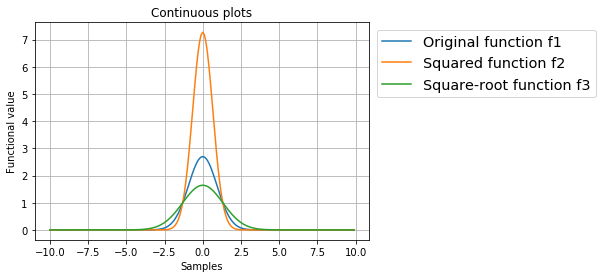

In [15]:
def plt_all(values):
    plt1 = plt.plot(x, values[0],label = 'Original function f1')
    plt2 = plt.plot(x, values[1],label = 'Squared function f2')   
    plt3 = plt.plot(x, values[2],label = 'Square-root function f3')
    plt.xlabel('Samples')
    plt.ylabel('Functional value')
    plt.legend(loc = 2, bbox_to_anchor = (1,1), fontsize = 'x-large' )
    plt.grid()
plt_all(values)
plt.title('Continuous plots')

# Q5. Fit functions for data values in f2.csv and f3.csv. Plot them.


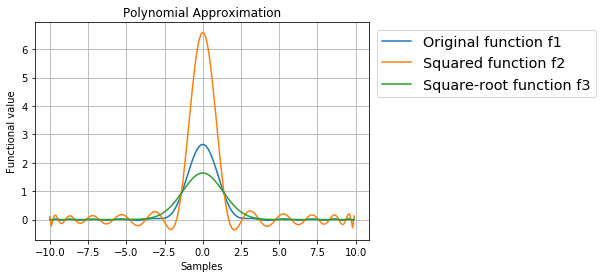

In [16]:
import numpy.polynomial.polynomial as poly

c = [ poly.polyfit(x,values[0],25), poly.polyfit(x,values[1],25), poly.polyfit(x,values[2],25) ]
y_approx = [ poly.polyval(x,c[0]), poly.polyval(x,c[1]), poly.polyval(x,c[2])]

plt_all(y_approx)
plt.title('Polynomial Approximation')